In [1]:
!pkill thor_*
import ai2thor
from ai2thor.controller import Controller,BFSController
from ai2thor.platform import CloudRendering
from ithor_tools.vis_tool import *
from ithor_tools.transform import cornerpoint_projection
from ithor_tools.map import single_scenemap
from ithor_tools.astar import astar
import random
import math
from IPython.display import display
from moviepy.editor import ImageSequenceClip,VideoFileClip

"AI2-THOR Version: " + ai2thor.__version__

'AI2-THOR Version: 4.2.0'

In [2]:
gridSize=0.01

controller = Controller(
    platform = CloudRendering,
    agentMode="locobot",
    visibilityDistance=5.0,
    scene="FloorPlan_Train1_3",
    gridSize=gridSize,
    movementGaussianSigma=0,
    rotateStepDegrees=90,
    rotateGaussianSigma=0,
    renderDepthImage=False,
    renderInstanceSegmentation=False,
    width=300,
    height=300,
    fieldOfView=60
)
landmark_names = ['Bed', 'DiningTable', 'StoveBurner', 'Toilet', 'Sink', 'Desk','CounterTop','Television','Sofa','SideTable','CoffeeTable']

In [3]:
controller.reset(
    # makes the images a bit higher quality
    width=800,
    height=800,

    # Renders several new image modalities
    renderDepthImage=True,
    renderInstanceSegmentation=False,
    renderSemanticSegmentation=False,
    renderNormalsImage=False
)


<ai2thor.server.Event at 0x7fb7389a0940
    .metadata["lastAction"] = Initialize
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}
>

In [4]:
scene_bounds = controller.last_event.metadata['sceneBounds']['center']
controller.step(
    action="AddThirdPartyCamera",
    position=dict(x=scene_bounds['x'], y=5.0, z=scene_bounds['z']),
    rotation=dict(x=90, y=0, z=0),
    orthographic=True,
    orthographicSize= 5.0, fieldOfView=100,
    skyboxColor="white"
)
pass

In [5]:
controller.step(dict(action='GetReachablePositions'))
rstate = controller.last_event.metadata['actionReturn']

In [6]:
controller.step(
    action="Teleport",
    position = rstate[10]
)

pos = controller.last_event.metadata['agent']['position']
pos = [pos['x'],pos['z']]
objects = controller.last_event.metadata['objects']

In [7]:
df = show_objects_table(objects)
df

Object Metadata. Not showing objectOrientedBoundingBox, axisAlignedBoundingBox, and receptacleObjectIds for clarity.


objectType                            objectId  \
0            Book           Book|+01.73|+00.48|-04.33   
1             Box            Box|+07.02|+00.18|-02.68   
2            Book           Book|+01.72|+00.51|-04.33   
3           Chair          Chair|+08.28|+00.00|-04.44   
4      AlarmClock     AlarmClock|+07.79|+00.80|-02.17   
5          Bottle         Bottle|+01.12|+00.48|-03.57   
6           Apple          Apple|+01.51|+00.76|-01.21   
7     BaseballBat    BaseballBat|+01.65|+00.68|-03.57   
8      BasketBall     BasketBall|+07.79|+00.12|-04.33   
9      GarbageCan     GarbageCan|+04.22|-00.03|-01.27   
10           Bowl           Bowl|+01.20|+00.71|-01.20   
11      FloorLamp      FloorLamp|+09.54|+00.00|-01.27   
12           Vase           Vase|+08.35|+00.79|-02.17   
13     Television     Television|+07.85|+00.96|-02.79   
14         Pillow         Pillow|+07.03|+00.38|-01.39   
15            Box            Box|+04.88|+00.59|-01.25   
16    SprayBottle    SprayBottle|+05.49|+00.72|-03.87   
17         Laptop         Laptop|+01.51|+00.71|-01.61   
18   TennisRacket   TennisRacket|+05.49|+00.02|-03.58   
19  RemoteControl  RemoteControl|+08.35|+00.47|-02.86   
20       DeskLamp       DeskLamp|+01.39|+00.48|-04.56   
21     HousePlant     HousePlant|+05.48|+00.71|-04.59   
22          Plate          Plate|+04.61|+00.59|-01.20   
23            Mug            Mug|+01.50|+00.71|-01.98   
24       Painting       Painting|+01.01|+01.42|-02.97   
25    DiningTable    DiningTable|+01.41|+00.00|-01.60   
26            Bed            Bed|+06.31|+00.00|-01.71   
27       ArmChair       ArmChair|+09.25|+00.00|-04.28   
28          Chair          Chair|+01.38|+00.01|-02.97   
29          Shelf          Shelf|+04.73|+00.08|-01.35   
30          Shelf          Shelf|+04.73|+00.34|-01.35   
31      SideTable       SideTable|+04.73|00.00|-01.35   
32      SideTable      SideTable|+01.21|+00.00|-03.66   
33       Painting       Painting|+08.90|+01.30|-04.90   
34           Sofa           Sofa|+06.78|+00.00|-04.45   
35    CoffeeTable     CoffeeTable|+07.86|00.00|-02.73   
36    CoffeeTable     CoffeeTable|+01.59|00.00|-04.38   
37          Chair          Chair|+01.84|+00.00|-01.79   
38          Shelf          Shelf|+08.13|+00.20|-02.12   
39        TVStand         TVStand|+08.13|00.00|-02.16   
40          Shelf          Shelf|+08.13|+00.59|-02.12   
41          Chair          Chair|+05.28|+00.00|-04.10   
42          Floor          Floor|+00.00|+00.00|+00.00   
43           Desk           Desk|+05.53|+00.00|-04.28   
44       Painting       Painting|+03.04|+01.07|-04.90   
45       Painting       Painting|+06.56|+01.41|-02.46   

                             name  position[x]  position[y]  position[z]  \
0                         Book_27       1.7251       0.4802      -4.3310   
1                          Box_27       7.0179       0.1790      -2.6760   
2                         Book_28       1.7249       0.5053      -4.3309   
3                     Chair_002_2       8.2794       0.0043      -4.4371   
4                  Alarm_Clock_13       7.7900       0.7956      -2.1700   
5                        Bottle_1       1.1159       0.4807      -3.5703   
6                        Apple_13       1.5148       0.7638      -1.2100   
7                   BaseballBat_1       1.6481       0.6766      -3.5662   
8                    Basketball_1       7.7928       0.1200      -4.3339   
9                          bin_13       4.2210      -0.0294      -1.2740   
10                        Bowl_13       1.1960       0.7078      -1.1981   
11                   Floor_Lamp_1       9.5375       0.0012      -1.2684   
12                  Vase_Medium_4       8.3470       0.7946      -2.1712   
13                  Television_13       7.8504       0.9580      -2.7896   
14                      pillow_13       7.0260       0.3815      -1.3930   
15                 DecorativeBox2       4.8820       0.5896      -1.2530   
16                 Spray_Bottle_1  

In [8]:
landmarks = []
for obj in objects:
    if obj['objectType'] in landmark_names:
        cp = [obj["position"]["x"],obj["position"]["z"]]
        flag = True
        for l in landmarks:
            if abs(l['cp'][0]-cp[0])+ abs(l['cp'][1]-cp[1]) < 0.7 and l['name']==obj['objectType']:
                flag = False
                break
        if flag:
            landmarks.append(dict(cp = cp, name=obj['objectType']))
        


In [11]:
visible_landmark_name = []
for l in landmarks:
    if l['name'] not in visible_landmark_name:
        visible_landmark_name.append(l['name'])

0.6868000030517578 10.446799278259277 -5.351839542388916 0.5981607437133789
0.7000000000000001 10.4 -5.300000000000001 0.5
(98, 59, 3)
[['Television' 'DiningTable' 'Bed' 'SideTable' 'Sofa' 'CoffeeTable'
  'Desk']]


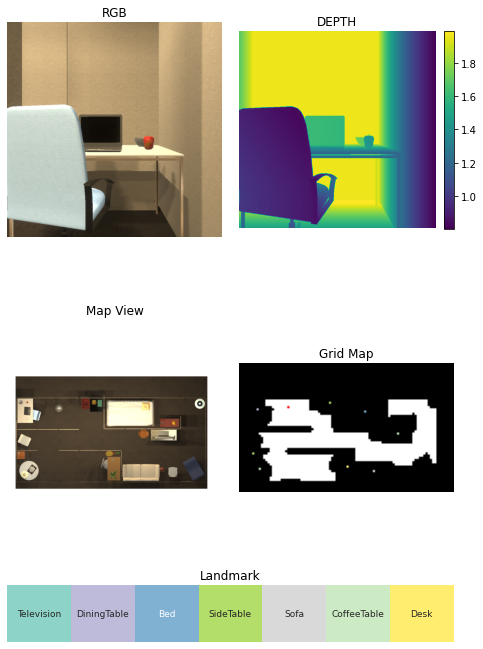

In [13]:
scene_bounds = controller.last_event.metadata['sceneBounds']['cornerPoints']
scene_bounds = cornerpoint_projection(scene_bounds)

## Notice stepsize should be smaller than gridsize
stepsize = gridSize
sm = single_scenemap(scene_bounds,rstate,stepsize = 0.1,landmark_names=visible_landmark_name,landmarks=landmarks)
landmark_config = dict(name=visible_landmark_name,color = sm.landmark_colors)
imshow_grid = sm.plot(pos)
plot_frames(controller.last_event,imshow_grid,landmark_config)


## Custom Astar

In [11]:
initstate = 20
goalstate = 15000 #100000


pos = rstate[initstate]
pos = [pos['x'],pos['z']]

goal = rstate[goalstate]
goal = [goal['x'],goal['z']]

pos,goal

([2.9800000190734863, -1.4700000286102295],
 [2.5199999809265137, -2.0799999237060547])

In [12]:
cpos= sm.gridmap_pos(pos)
cgoal = sm.gridmap_pos(goal)
print(cpos,cgoal)
path = astar(sm.grid_map,cgoal,cpos)

[22, 38] [18, 32]
Done


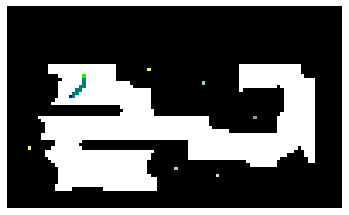

In [13]:
def show_path(path,gridmap):
    gridmap = gridmap.copy()
    for p in path[1:-1]:
        gridmap[p[0],p[1],:] = [0,0.5,0.5]
    init = path[0]
    end = path[-1]
    gridmap[init[0],init[1],:] = [0,1,0]
    gridmap[end[0],end[1],:] = [0,0,1]
    gridmap = np.rot90(gridmap)
    plt.axis('off')
    plt.imshow(gridmap)
    
show_path(path,sm.grid_map)

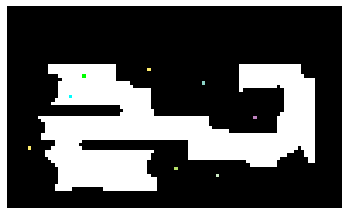

In [14]:
## When astar doesn't work

gridmap = sm.grid_map
init = cpos
end = cgoal

gridmap_rgb = gridmap.copy()

gridmap_rgb[init[0],init[1],:] = [0,1,0]
gridmap_rgb[end[0],end[1],:] = [0,1,1]
gridmap_rgb = np.rot90(gridmap_rgb)
plt.axis('off')
plt.imshow(gridmap_rgb)

In [15]:
xyzpath = []
for e in path:
    pos = sm.gridmap2xyz(e,rstate[goalstate]['y'])
    xyzpath.append(pos)

xyzpath.insert(0,rstate[initstate])
xyzpath.append(rstate[goalstate])


In [16]:
controller.step(
    action="Teleport",
    position = rstate[initstate]
)

<ai2thor.server.Event at 0x7fa15c7a1f10
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [17]:
# Teleport to initial position
import time

controller.step(
    action="Teleport",
    position = rstate[initstate]
)
frames = []
for e in range(len(xyzpath)-1):

    dx = xyzpath[e+1]['x'] - xyzpath[e]['x']
    dz = xyzpath[e+1]['z'] - xyzpath[e]['z']
    trot = math.atan2(dx,dz)*180/math.pi
    crot = controller.last_event.metadata['agent']['rotation']['y'] 
    rot = trot - crot
    event = controller.step(
        action="RotateRight",
        degrees=rot
    )
    frames.append(controller.last_event.third_party_camera_frames[0])

    if not event.metadata['lastActionSuccess']:
        print('Collision!')
        break
    
    event = controller.step(
        action="MoveAhead",
        moveMagnitude=math.sqrt(dx**2+dz**2)
    )
    frames.append(controller.last_event.third_party_camera_frames[0])
    
    if not event.metadata['lastActionSuccess']:
        print('Collision!')
        break
    
    time.sleep(0.5)
    
controller.step(
    action="Teleport",
    position = controller.last_event.metadata['agent']['position']
)

<ai2thor.server.Event at 0x7fa10eab3e80
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

[2.5199999809265137, -2.0799999237060547]
[['Bed' 'DinningTable' 'StoveBurner' 'Toilet' 'Sink' 'Desk' 'CounterTop'
  'Television' 'Sofa' 'SideTable']]


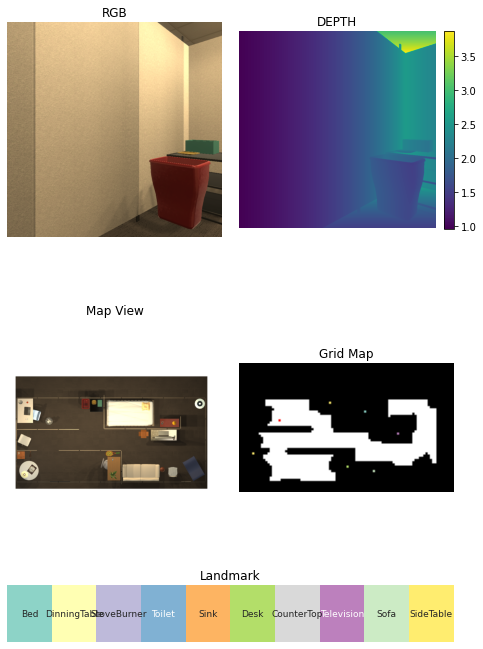

In [18]:
pos = controller.last_event.metadata['agent']['position']
pos = [pos['x'],pos['z']]
print(pos)
imshow_grid = sm.plot(pos)
plot_frames(controller.last_event,imshow_grid,landmark_config)

In [19]:
video = ImageSequenceClip(frames, fps=10)
video.write_gif('temp.gif')


MoviePy - Building file temp.gif with imageio.


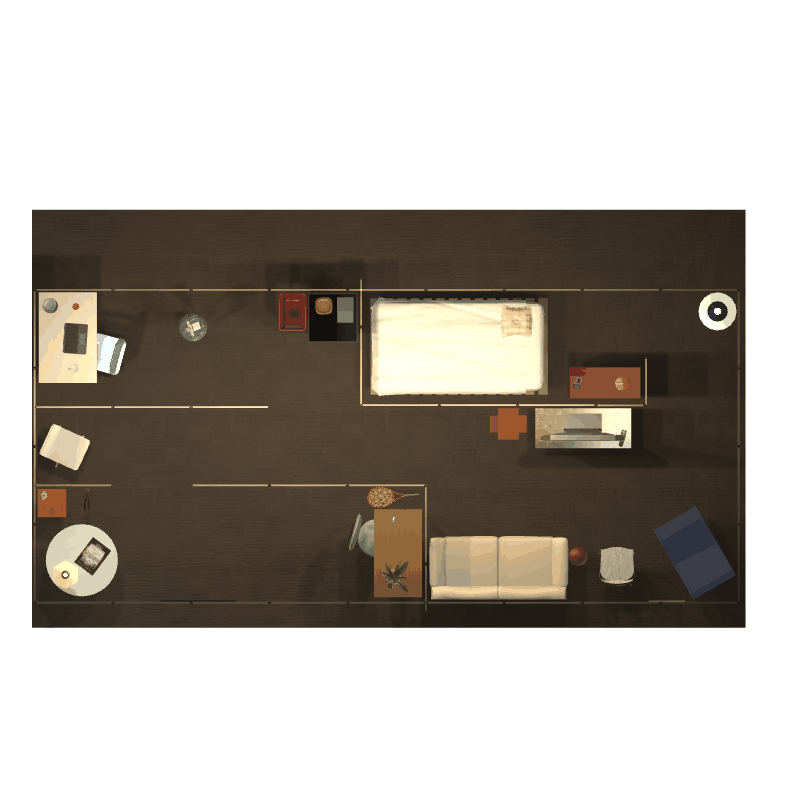

In [20]:
from IPython.display import Image as IM
with open('temp.gif','rb') as file:
    display(IM(file.read(),width = 300))

## Built-in path planning

In [21]:
def rstate2pos(rstate):
    ls = []
    ls.append(rstate['x'])
    ls.append(rstate['z'])
    
    return ls

[[22, 38], [32, 30], [34, 28], [34, 27], [32, 26], [22, 20], [20, 19], [20, 17], [22, 16], [39, 10]]


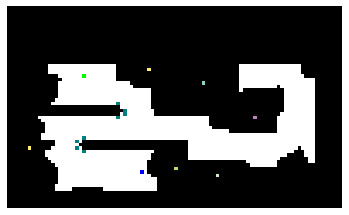

In [22]:
initstate = 20
goalstate = 100000

from ai2thor.util.metrics import (
    get_shortest_path_to_point
)
incpos = rstate[initstate]
ingoal = rstate[goalstate]

inpath = get_shortest_path_to_point(
   controller=controller,
    target_position= ingoal,
    initial_position= incpos,
    allowed_error=0
)

# Adjust invalid depth -> Don't know why this happens
for point in inpath:
    point['y'] = incpos['y']


savepath = []
for point in inpath:
    xzpoint = [point['x'], point['z']]
    temp = sm.gridmap_pos(xzpoint)
    savepath.append(temp)

print(savepath)
show_path(savepath,sm.grid_map)

TypeError: Invalid shape (59, 98, 3, 3) for image data

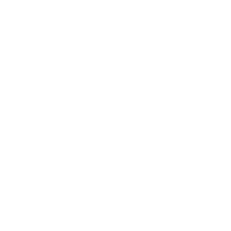

In [23]:
## When built-in doesn't work

gridmap = 1-sm.grid_map
init = sm.gridmap_pos(rstate2pos(incpos))
end = sm.gridmap_pos(rstate2pos(inpath[-1]))

gridmap_rgb = np.expand_dims(gridmap,-1)
gridmap_rgb = np.repeat(gridmap_rgb,3,-1)

gridmap_rgb[init[0],init[1],:] = [0,1,0]
gridmap_rgb[end[0],end[1],:] = [0,1,1]
gridmap_rgb = np.rot90(gridmap_rgb)
plt.axis('off')
plt.imshow(gridmap_rgb)

In [ ]:
controller.step(dict(action='GetReachablePositions'))

temp = controller.last_event.metadata['actionReturn']


In [ ]:
import time

controller.step(
    action="Teleport",
    position = rstate[initstate],
    rotation=dict(x=0, y=40, z=0),
)

frames = []
frames.append(controller.last_event.third_party_camera_frames[0])
for e in range(len(inpath)-1):

    dx = inpath[e+1]['x'] - inpath[e]['x']
    dz = inpath[e+1]['z'] - inpath[e]['z']
    trot = math.atan2(dx,dz)*180/math.pi
    crot = controller.last_event.metadata['agent']['rotation']['y'] 
    rot = trot - crot
    event = controller.step(
        action="RotateRight",
        degrees=rot
    )
    frames.append(controller.last_event.third_party_camera_frames[0])
    if not event.metadata['lastActionSuccess']:
        print('Collision!')
        # break
    
    
    event = controller.step(
        action="MoveAhead",
        moveMagnitude=math.sqrt(dx**2+dz**2)
    )
    frames.append(controller.last_event.third_party_camera_frames[0])
    if not event.metadata['lastActionSuccess']:
        print('Collision!')
        # break
    
    time.sleep(0.5)

controller.step(
    action="Teleport",
    position = controller.last_event.metadata['agent']['position']
)


In [ ]:
pos = controller.last_event.metadata['agent']['position']
print("Current position:",pos, "Goal position", rstate[goalstate])
pos = [pos['x'],pos['z']]
imshow_grid = sm.plot(pos)
plot_frames(controller.last_event,imshow_grid,landmark_config)

In [ ]:
video = ImageSequenceClip(frames, fps=10)
video.write_gif('temp.gif')


In [ ]:
from IPython.display import Image as IM
with open('temp.gif','rb') as file:
    display(IM(file.read(),width = 300))